In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import tensorflow as tf
import numpy as np
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Sequential

In [2]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#  Import and read the complaint_data.csv.
complaint_Data_df = pd.read_csv("../Resources/ModelData/train_test_data.csv")
complaint_Data_df.head()

,Product,Consumer complaint narrative
0,Credit card,16 date description debit 60 2 purchase 30 9 6...
1,Checking or savings account,due longer since notified dollar received leav...
2,Credit card,fcra asked due longer since please ive 19 plen...
3,Credit card,unwanted letter due additional alert received ...
4,Credit card,investigation also prehistoric issue possibly ...


In [4]:
complaint_Data_df.size

15712

In [5]:
X = complaint_Data_df['Consumer complaint narrative']  # Features
y = complaint_Data_df['Product']  # Target labels

In [6]:
#X is our feature set and y is our target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, #20% of the data is allocated to the test set, and 80% to the training set.
    stratify=y, #Ensures the distribution of y categories is preserved in the split.
    random_state=42
)

In [7]:
## Tokenize the text
# Define tokenizer with a vocabulary size of 25,000
tokenizer = Tokenizer(num_words=25000)

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train.values)

# Transform training and testing text data into sequences of integers
train_sequences = tokenizer.texts_to_sequences(X_train.values)
test_sequences = tokenizer.texts_to_sequences(X_test.values)

# Print sample outputs for verification
print("Sample train sequence:", train_sequences[0])
print("Sample test sequence:", test_sequences[0])

Sample train sequence: [201, 75, 169, 703, 73, 667, 544, 63, 369, 3, 603, 355, 24, 687, 330, 559, 609, 688, 160, 204, 242, 247, 645, 121, 668, 200, 488, 93, 433]
Sample test sequence: [54, 27, 860, 67, 98, 16, 349, 4610, 102, 236, 24, 97, 365, 792, 616, 57, 280, 454, 700, 3784, 363, 623, 972, 301, 288, 999, 103, 449, 1111, 130, 1047, 410, 109, 95, 237, 185, 1095, 322, 1245, 129, 269, 110, 1, 14, 281, 26, 551, 3814, 872, 46, 108, 300, 239, 25, 971, 299, 49, 184, 401, 162, 52, 31, 80, 470, 196, 60, 910, 387, 59, 659, 666, 174, 1642, 78, 4, 219, 583, 6, 362, 1513, 121, 3040, 158, 29, 43, 529, 1287, 1182, 233, 71, 35, 920, 1104, 96, 354, 28, 18, 5707, 169, 2940, 1009, 471, 3, 38, 159, 3672, 11, 84, 1067, 76, 48, 1026, 128, 89, 7, 418, 51, 419, 20, 53, 5, 132, 545]


In [8]:
# Extract the word index (mapping of words to their respective indices)
word_index = tokenizer.word_index#each unique word (token) in the training data to a unique integer based on the word's frequency
print(f'Found {len(word_index)} unique tokens.')#This gives the total number of unique words (tokens) that the Tokenizer encountered during the fitting process

Found 14092 unique tokens.


In [9]:
vocabulary_size = len(tokenizer.word_index)+1#Neural networks typically reserve index 0 for padding purposes when processing sequences.Adding +1 ensures that the total vocabulary size accounts for the padding index (0) as well.
vocabulary_size

14093

In [ ]:
#Knowing the number of unique tokens helps you understand the size of your vocabulary and decide on the num_words parameter for your tokenizer.
#For instance, if len(word_index) is 30,000 but you set num_words=25,000, only the 25,000 most frequent words will be used during tokenization, and the rest will be ignored.

In [10]:
#this code calculates the lengths of all sequences (number of words in each text) in the X_train dataset and computes summary statistics
# Get lengths of all sequences in the dataset
sequence_lengths = [len(text.split()) for text in X_train.values]#the number of words in a text in X_train.
print( X_train.values)
# Compute statistics
import numpy as np
print("Max length:", np.max(sequence_lengths))
print("Average length:", np.mean(sequence_lengths))
print("Median length:", np.median(sequence_lengths))
print("90th percentile:", np.percentile(sequence_lengths, 90))
print("95th percentile:", np.percentile(sequence_lengths, 95))

['act consumer reporting nonverbal u 6802 effective immediately authorization credit indefinitely capital one unwritten c 1681 verbal oral may 15 fair written federally xxxx opting per protected given usc'
 'due closed pull wasting deceptive received hard elaborate acting bad purchase request approval hurting approved credit explanation pre grocery account card preferred check used refused time applied resulted make remove practice chase store faith 2024 sapphire given digital increase'
 'customer loss never ending monthly payment called past feature 320 app situation call representative partnership fnbo almost consumer needed opened 2 bureau first going spoke affect informed double account information collection rep bank every following email statement amount timely directly moved change due since party greenlight stating underpaying changed card department unfair offered would service supervisor month asked paperwork also closed received summer closure pay behind removed made credit 

In [ ]:
#Deep learning models, such as LSTMs or CNNs, require inputs of consistent shape.

In [11]:
# Pad sequences to ensure equal length(This approach reduces unnecessary padding while retaining most of the relevant data)
X_train_data = pad_sequences(train_sequences, maxlen=718, padding="post", truncating='post')#(Example maxlen based on our data analysis)
X_test_data = pad_sequences(test_sequences, maxlen=718, padding="post", truncating='post')#Truncates sequences longer than maxlen from the end.
print(f"X_train_data shape: {X_train_data.shape}")
print(f"X_test_data shape: {X_test_data.shape}")
print(X_test_data)

X_train_data shape: (6284, 718)
X_test_data shape: (1572, 718)
[[  54   27  860 ...    0    0    0]
 [  35   28   23 ...    0    0    0]
 [2632  182    6 ...    0    0    0]
 ...
 [1377  101  794 ...    0    0    0]
 [4922   27   47 ...    0    0    0]
 [  35   54   28 ...    0    0    0]]


In [ ]:
#LabelEncoder: A preprocessing tool from sklearn used to convert categorical labels (classes) into numerical values.


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the training and test target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the mapping of labels
print("Class Mapping:", dict(enumerate(label_encoder.classes_)))
print("Encoded y_train sample:", y_train_encoded[:5])

Class Mapping: {0: 'Checking or savings account', 1: 'Credit card'}
Encoded y_train sample: [1 1 1 1 1]


In [13]:
# Apply one-hot encoding to labels
labels_train = to_categorical(np.asarray(y_train_encoded))
labels_test = to_categorical(np.asarray(y_test_encoded))
# Print shapes again to verify
print(labels_train)
print('Shape of data tensor:', X_train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Shape of data tensor: (6284, 718)
Shape of label tensor: (6284, 2)
Shape of label tensor: (1572, 2)


In [14]:
model = Sequential()

# Add an embedding layer
model.add(Embedding(vocabulary_size,                # Vocabulary size
                    output_dim=300,                # Embedding size (vector size)
                    input_length=718,              # Maximum length of input sequences
                    trainable=True))               # Embeddings are trainable

# Add LSTM layer
#Bidirectional LSTM
model.add(Bidirectional(LSTM(300, dropout = 0.2, recurrent_dropout = 0.2)))

# Add Dense output layer for multiclass classification
model.add(Dense(2, activation='softmax'))  # 2 classes for multiclass

C:\Users\manas\anaconda3\anaconda\envs\pythondata\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train_data, labels_train,
 batch_size=64,
 epochs=3,
 validation_data=(X_test_data, labels_test))

Epoch 1/3
99/99 ━━━━━━━━━━━━━━━━━━━━ 1251s 13s/step - accuracy: 0.6949 - loss: 0.5773 - val_accuracy: 0.8931 - val_loss: 0.2773
Epoch 2/3
99/99 ━━━━━━━━━━━━━━━━━━━━ 1516s 15s/step - accuracy: 0.9208 - loss: 0.2177 - val_accuracy: 0.8887 - val_loss: 0.2922
Epoch 3/3
99/99 ━━━━━━━━━━━━━━━━━━━━ 1624s 16s/step - accuracy: 0.9574 - loss: 0.1360 - val_accuracy: 0.9071 - val_loss: 0.2596


In [33]:
# Predict class probabilities
predicted = model.predict(X_test_data)

# Convert probabilities to class labels
predicted_classes = np.argmax(predicted, axis=1)

# If you need to convert these back to one-hot encoded format
predicted_one_hot = to_categorical(predicted_classes, num_classes=labels_test.shape[1])

# Check shapes
print("Predicted classes shape:", predicted_classes.shape)
print("Predicted one-hot shape:", predicted_one_hot.shape)

50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step
Predicted classes shape: (1572,)
Predicted one-hot shape: (1572, 2)


In [34]:
# Convert one-hot encoded labels to class labels
true_classes = np.argmax(labels_test, axis=1)

# Check the shapes to make sure they match
print("True labels (converted to class indices):", true_classes.shape)


True labels (converted to class indices): (1572,)


In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9071


In [36]:
from sklearn.metrics import classification_report

# Get classification report
print(classification_report(true_classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       758
           1       0.93      0.89      0.91       814

    accuracy                           0.91      1572
   macro avg       0.91      0.91      0.91      1572
weighted avg       0.91      0.91      0.91      1572



In [37]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[700  58]
 [ 88 726]]


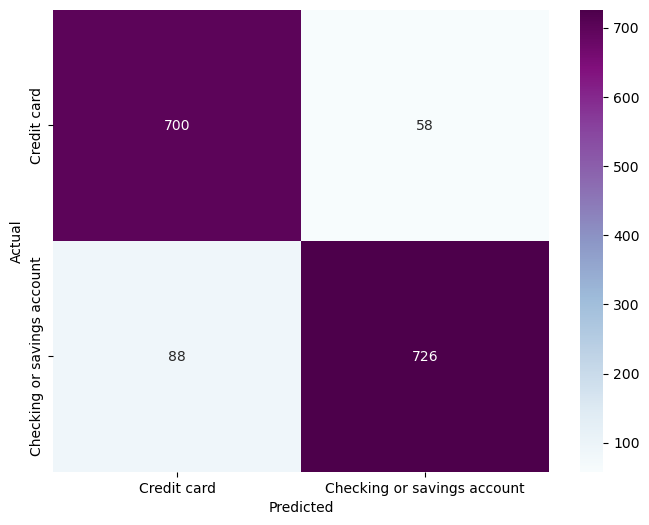

In [134]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(true_classes, predicted_classes)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=complaint_Data_df['Product'].unique(),yticklabels=complaint_Data_df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Save the plot
plt.savefig("confusion_matrix_heatmap_for_LSTM.png")
plt.show()

In [132]:
# Sample data
lstm_texts = ['16 date description debit 60 2 purchase 30 9 6 25 credit 100 late 13 50 5 43 56 150 110 1 23 55 payment 21 29 3 66 trans amount 4 45 fee 86 49 7 75 charge 36 170 type posted 00 8 22 10']
#lstm_texts1 = ['fee bank process closed alleged resulting negative monthly u balance close failed account request']

# Tokenize the text (make sure texts is in a list)
lstm_sequences = tokenizer.texts_to_sequences(lstm_texts)

# Pad sequences to ensure consistent input length (maxlen is the length expected by your model)
lstm_padded_sequences = pad_sequences(lstm_sequences, maxlen=718, padding="post", truncating='post')


# Predict using the model
predictions_lstm_test = model.predict(lstm_padded_sequences)

# Print predictions
print(predictions_lstm_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
[[0.00299367 0.99700636]]


In [133]:
predicted_lstm_class = np.argmax(predictions_lstm_test, axis=1)
print(f"Predicted class: {predicted_lstm_class}")


Predicted class: [1]


In [39]:
# Build LSTM with pre-trained Glove word embeddings

In [41]:
# Set the directory where GloVe embeddings are stored
import os
GLOVE_DIR = r"C:\Users\manas\OneDrive\Documents\BOOTCAMP\project4\ML_CFPB_Complaint_Classification\Glove"  # Update this path to your GloVe directory
embeddings_index = {}

# Open the GloVe file
try:
    with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
except FileNotFoundError:
    print("Error: GloVe file not found. Check the GLOVE_DIR path.")
    raise

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [52]:
# create a weight matrix for words in training docs
# Initialize an empty embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))  # Shape: (vocabulary_size, embedding_dim)

for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break  # Stop if index exceeds vocabulary size
    else:
        # Get the GloVe vector for the word
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Assign the GloVe vector to the corresponding index in the matrix
            embedding_matrix[index] = embedding_vector

In [53]:
print(f"Embedding matrix shape: {embedding_matrix.shape}")
# Should output: (vocabulary_size, embedding_dim)

Embedding matrix shape: (14093, 100)


In [54]:
[(k,v) for k,v in word_index.items() if v==4]

[('card', 4)]

In [55]:
embedding_matrix[4] 

array([ 1.62919998e-01, -3.17979991e-01,  4.23280001e-01, -8.67670000e-01,
        4.51009989e-01,  5.78570008e-01,  2.66449992e-02, -1.26479998e-01,
        3.34650010e-01, -4.20470014e-02, -4.05960009e-02,  1.64780006e-01,
       -6.73439980e-01, -3.37509990e-01,  3.59129995e-01,  5.73830009e-01,
        8.46199989e-01,  3.63739997e-01,  3.06300014e-01, -6.80499971e-02,
       -6.76100016e-01, -1.91469997e-01, -1.45940006e-01,  3.26210004e-03,
        6.69489980e-01, -3.35880011e-01,  1.78680003e-01, -3.93599987e-01,
        1.77000001e-01, -3.36420000e-01,  1.92880005e-01,  1.00300002e+00,
       -2.17940003e-01,  2.42709994e-01,  1.09350002e+00, -1.03030004e-01,
       -7.91970015e-01, -1.35059997e-01,  1.21560000e-01, -9.83770013e-01,
        1.02999997e+00, -1.02419996e+00,  6.02689981e-01, -1.59860000e-01,
       -2.67729998e-01, -5.56299984e-01,  2.58340001e-01, -8.50209966e-02,
       -1.52209997e-01, -3.37170005e-01,  2.63579991e-02,  2.31710002e-01,
       -1.80559993e-01,  

In [56]:
# LSTM with glove

In [57]:
model_lstm_glove = Sequential()

# Add an embedding layer
# Add an embedding layer
model_lstm_glove.add(Embedding(input_dim=14093,                # Vocabulary size
                    output_dim=100,                # Embedding size (vector size)
                    input_length=718,
                    weights=[embedding_matrix],    # Pretrained embeddings# Maximum length of input sequences
                    trainable=True))  

# Add a bidirectional LSTM layer
model_lstm_glove.add(Bidirectional(
    LSTM(300, dropout=0.2, recurrent_dropout=0.2)  # Correct dropout arguments
))

# Add a dense output layer
model_lstm_glove.add(Dense(2, activation='softmax'))  # Output layer with 11 classes

In [59]:
# Compile the model
model_lstm_glove.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [61]:
History = model_lstm_glove.fit(X_train_data, labels_train,
 batch_size=64,
 epochs=4,
 validation_data=(X_test_data, labels_test))

Epoch 1/4
99/99 ━━━━━━━━━━━━━━━━━━━━ 804s 8s/step - accuracy: 0.8244 - loss: 0.3899 - val_accuracy: 0.8912 - val_loss: 0.2714
Epoch 2/4
99/99 ━━━━━━━━━━━━━━━━━━━━ 764s 8s/step - accuracy: 0.8829 - loss: 0.2922 - val_accuracy: 0.8957 - val_loss: 0.2584
Epoch 3/4
99/99 ━━━━━━━━━━━━━━━━━━━━ 741s 7s/step - accuracy: 0.9078 - loss: 0.2334 - val_accuracy: 0.9103 - val_loss: 0.2373
Epoch 4/4
99/99 ━━━━━━━━━━━━━━━━━━━━ 778s 8s/step - accuracy: 0.9207 - loss: 0.2008 - val_accuracy: 0.9192 - val_loss: 0.2117


In [62]:
# Predict class probabilities
predicted1 = model_lstm_glove.predict(X_test_data)

# Convert probabilities to class labels
predicted_classes1 = np.argmax(predicted1, axis=1)

# If you need to convert these back to one-hot encoded format
predicted_one_hot1 = to_categorical(predicted_classes1, num_classes=labels_test.shape[1])

# Check shapes
print("Predicted classes shape:", predicted_classes1.shape)
print("Predicted one-hot shape:", predicted_one_hot1.shape)

50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step
Predicted classes shape: (1572,)
Predicted one-hot shape: (1572, 2)


In [63]:
# Convert one-hot encoded labels to class labels
true_classes1 = np.argmax(labels_test, axis=1)

# Check the shapes to make sure they match
print("True labels (converted to class indices):", true_classes1.shape)

True labels (converted to class indices): (1572,)


In [65]:
Accuracy = accuracy_score(true_classes1, predicted_classes1)
print(f"Accuracy: {Accuracy:.4f}")


Accuracy: 0.9192


In [137]:
# Get classification report
print(classification_report(true_classes1, predicted_classes1))


              precision    recall  f1-score   support

           0       0.93      0.90      0.91       758
           1       0.91      0.94      0.92       814

    accuracy                           0.92      1572
   macro avg       0.92      0.92      0.92      1572
weighted avg       0.92      0.92      0.92      1572



In [67]:
# Confusion matrix
CM= confusion_matrix(true_classes1, predicted_classes1)
print("Confusion Matrix:\n", CM)


Confusion Matrix:
 [[680  78]
 [ 49 765]]


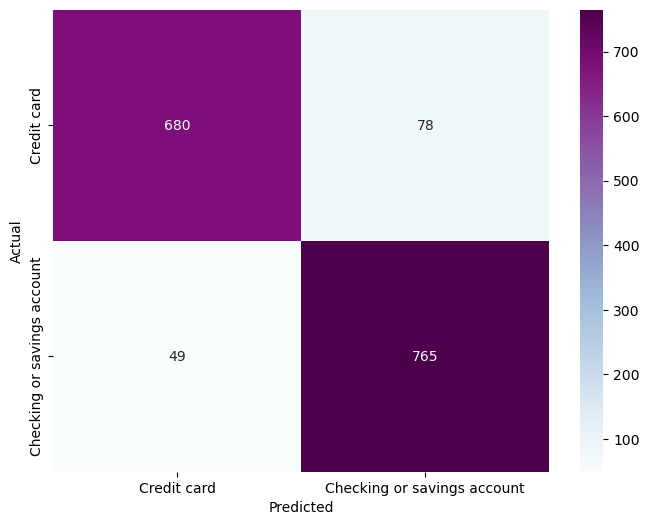

In [135]:

#conf_mat = confusion_matrix(true_classes1, predicted_classes1)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(CM, annot=True, fmt="d", cmap="BuPu",xticklabels=complaint_Data_df['Product'].unique(),yticklabels=complaint_Data_df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Save the plot
plt.savefig("confusion_matrix_heatmap_for_LSTM_(GLOVE).png")
plt.show()

In [128]:
# Sample data
#texts = ['16 date description debit 60 2 purchase 30 9 6 25 credit 100 late 13 50 5 43 56 150 110 1 23 55 payment 21 29 3 66 trans amount 4 45 fee 86 49 7 75 charge 36 170 type posted 00 8 22 10']
texts1 = ['fee bank process closed alleged resulting negative monthly u balance close failed account request']

# Tokenize the text (make sure texts is in a list)
sequences = tokenizer.texts_to_sequences(texts1)

# Pad sequences to ensure consistent input length (maxlen is the length expected by your model)
padded_sequences = pad_sequences(sequences, maxlen=718, padding="post", truncating='post')


# Predict using the model
predictions_ext_test = model_lstm_glove.predict(padded_sequences)

# Print predictions
print(predictions_ext_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
[[0.967193   0.03280701]]


In [129]:
predicted_class2 = np.argmax(predictions_ext_test, axis=1)
print(f"Predicted class: {predicted_class2}")


Predicted class: [0]
